In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pulser import Pulse, Sequence, Register

from pulser.devices import Chadoq2
from pulser.waveforms import InterpolatedWaveform, BlackmanWaveform
from pulser_simulation import QutipEmulator

C:\Users\thetu\anaconda3\lib\site-packages\qutip\__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


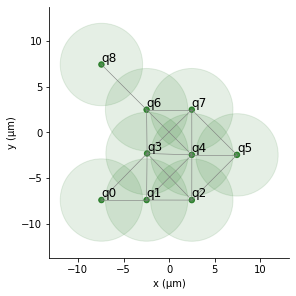

In [3]:
#Define the register and therefore the graph
reg = Register({
    "q0": 1.1*np.array((-6.75, -6.75)),
    "q1": 1.1*np.array((-2.25, -6.75)),
    "q2": 1.1* np.array((2.25, -6.756294250488281)),
    "q3":  1.1*np.array((-2.2035591125488283, -2.1134979248046877)),
    "q4":  1.1*np.array((2.256944274902344, -2.25)),
    "q5":  1.1*np.array((6.75, -2.25)),
    "q6": 1.1* np.array((-2.25, 2.25)),
    "q7":  1.1*np.array((2.25, 2.25)),
    "q8":  1.1*np.array((-6.75, 6.75)),
})

R = 10
reg.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(R),
    draw_graph=True,
    draw_half_radius=True,
)


In [146]:
def plot_distribution(C):
    C = dict(sorted(C.items(), key=lambda item: item[1], reverse=True)[:10])
    plt.figure(figsize=(18, 6))
    plt.xlabel("bitstrings")
    plt.ylabel("counts")
    plt.bar(C.keys(), C.values(), width=0.5)
    plt.xticks(rotation="vertical")
    plt.show()


In [5]:
# We choose an omega value based on the bloquade radius we have defined
Omega = 3.14*(3)
delta_0 = -60  # negative value with magnitude higher than omega (10 times)
delta_f = 60  # positive value
T = 4000  # time in ns, we choose a time long enough to ensure the propagation of information in the system


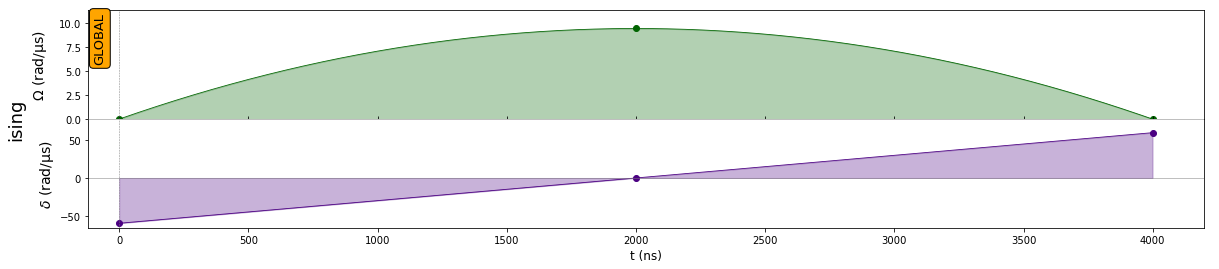

In [6]:
#Two consecutive pulses
adiabatic_pulse = Pulse(
    InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
    InterpolatedWaveform(T, [delta_0, 0, delta_f]),
    0,
)
#define a sequence and declare a channel
seq = Sequence(reg, Chadoq2)
seq.declare_channel("ising", "rydberg_global")
#Adding an adiabatic pulse to the system
seq.add(adiabatic_pulse, "ising")
#seq.measure(basis="ground-rydberg")
seq.draw()


In [7]:
#Using Quera Qutip to simulate the seq
simul = QutipEmulator.from_sequence(seq)
results = simul.run()
final = results.get_final_state()
count_dict = results.sample_final_state()


In [8]:
#count_dict

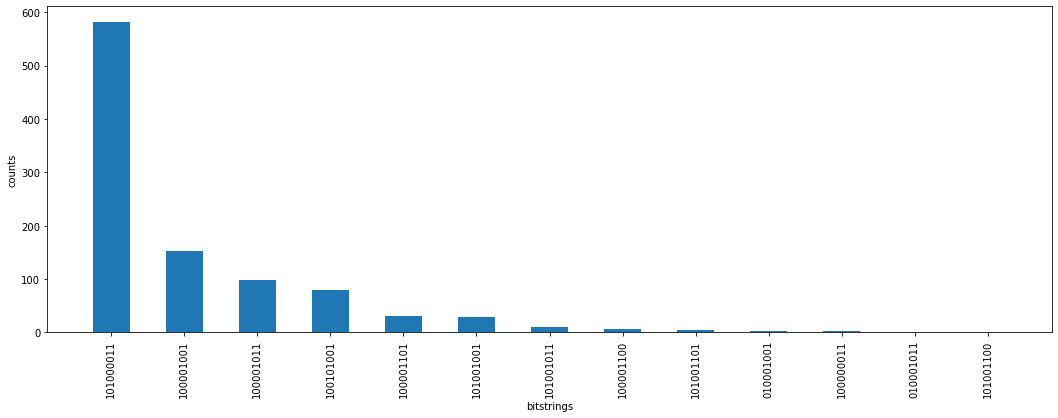

In [9]:
plot_distribution(count_dict)


### How does the time evolution affect the quality of the results?

In [10]:
#Define a function to see how T (detuning time) changes the final value
cost = []
for T in 1000 * np.linspace(1, 10, 10):
    seq = Sequence(reg, Chadoq2)
    seq.declare_channel("ising", "rydberg_global")
    adiabatic_pulse = Pulse(
        InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
        InterpolatedWaveform(T, [delta_0, 0, delta_f]),
        0,
    )
    seq.add(adiabatic_pulse, "ising")
    simul = QutipEmulator.from_sequence(seq)
    results = simul.run()
    final = results.get_final_state()
    count_dict = results.sample_final_state()
    max_count = list(dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True)).keys())[0]
    cost.append(max_count)


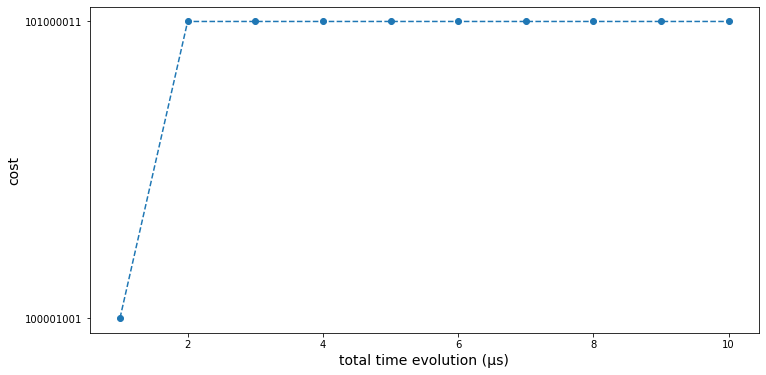

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), np.array(cost), "--o")
plt.xlabel("total time evolution (µs)", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.show()


MWIS or QUBO problem

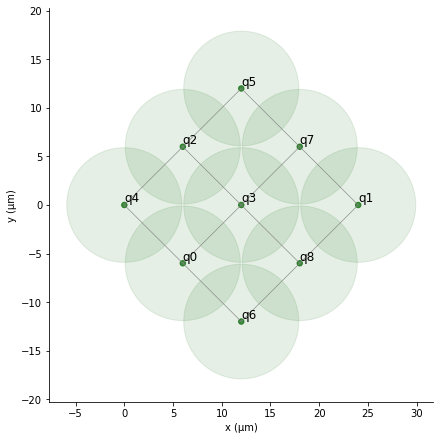

In [136]:
#Define the register again
locs = [(1, -1), (4, 0), (1, 1), (2, 0), (0, 0), (2, 2), (2, -2), (3, 1), (3, -1)]
reg = Register({
    "q0": 6*np.array((1,-1)),
    "q1": 6*np.array((4,0)),
    "q2": 6*np.array((1,1)),
    "q3": 6*np.array((2,0)),
    "q4": 6*np.array((0,0)) ,
    "q5": 6*np.array((2,2)),
    "q6": 6*np.array((2,-2)),
    "q7": 6*np.array((3,1) ),
    "q8": 6*np.array((3,-1)) ,
})

R = 2
reg.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(R),
    draw_graph=True,
    draw_half_radius=True,
)


In [126]:
#Omega, Delta = 2*3.14*862690/(30**6) = 0.007431

In [156]:
2*3.14*862690/(6**6)

116.11996742112483

In [128]:
import random
weights  = np.array([random.random() for i in range(9)])
weights

array([0.09729969, 0.0270393 , 0.50559507, 0.70910072, 0.25431199,
       0.14446796, 0.85438097, 0.41052801, 0.79081504])

In [165]:
# We choose an omega value based on the bloquade radius we have defined
Omega = 3.14*(4)
delta_0 = -120  # negative value with magnitude higher than omega (10 times)
delta_f = 120  # positive value
T = 4000  # time in ns, we choose a time long enough to ensure the propagation of information in the system


In [ ]:
ch = ["c0",'c1','c2','c3','c4','c5','c6','c7','c8']
q = ['q0','q1','q2','q3','q4','q5','q6','q7','q8']

#Define the number of channels equal to the number of qubits
seq = Sequence(reg, Chadoq2)
seq.declare_channel("ch0", "rydberg_global")
adiabatic_pulse = Pulse(InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),InterpolatedWaveform(T, [delta_0, 0,delta_f]),0)
#Adding an adiabatic pulse to the system
seq.add(adiabatic_pulse, "ch0")
seq.declare_channel("ising", "rydberg_local",initial_target = 'q0')
for i in range(9):
    seq.target(q[i],"ising")
    adiabatic_pulse = Pulse(
        InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
        InterpolatedWaveform(T, [weights[i]*delta_0, 0, weights[i]*delta_f]),
        0,
    )
    #Adding an adiabatic pulse to the system
    seq.add(adiabatic_pulse, "ising")

#Using Quera Qutip to simulate the seq
simul = QutipEmulator.from_sequence(seq)
results = simul.run()
final = results.get_final_state()
count_dict = results.sample_final_state()


In [ ]:
plot_distribution(count_dict)


In [95]:
C6 = 3.14*0.86269
Q = np.zeros((8,8))
#Connectivity is 0-1,0-3,0-4, 1-2,1-5, 2-3, 2-6, 3-7, 4-5,4-7, 5-6, 6-7
for i in range(8):
    #Q[i,i] = 0
    Q[i,i] = C6
Q[0,1], Q[0,3], Q[0,4], Q[1,2], Q[1,5], Q[2,3], Q[2,6], Q[3,7], Q[4,5], Q[4, 7], Q[5,6], Q[6,7] = [C6 for i in range(12)]
Q[0,3], Q[0,5], Q[0,7], Q[1,3], Q[1,4], Q[1,6], Q[2,7], Q[2,5], Q[3,4], Q[3,6], Q[4,6], Q[5,7] = [-C6 for i in range(12)]
#Q[0,6], Q[1,7], Q[2,4], Q[3,5] = [-1.73*C6 for i in range(4)]
Q = Q + Q.T

In [96]:
Q

array([[ 5.4176932,  2.7088466,  0.       , -2.7088466,  2.7088466,
        -2.7088466,  0.       , -2.7088466],
       [ 2.7088466,  5.4176932,  2.7088466, -2.7088466, -2.7088466,
         2.7088466, -2.7088466,  0.       ],
       [ 0.       ,  2.7088466,  5.4176932,  2.7088466,  0.       ,
        -2.7088466,  2.7088466, -2.7088466],
       [-2.7088466, -2.7088466,  2.7088466,  5.4176932, -2.7088466,
         0.       , -2.7088466,  2.7088466],
       [ 2.7088466, -2.7088466,  0.       , -2.7088466,  5.4176932,
         2.7088466, -2.7088466,  2.7088466],
       [-2.7088466,  2.7088466, -2.7088466,  0.       ,  2.7088466,
         5.4176932,  2.7088466, -2.7088466],
       [ 0.       , -2.7088466,  2.7088466, -2.7088466, -2.7088466,
         2.7088466,  5.4176932,  2.7088466],
       [-2.7088466,  0.       , -2.7088466,  2.7088466,  2.7088466,
        -2.7088466,  2.7088466,  5.4176932]])

In [97]:
bitstrings = [np.binary_repr(i, len(Q)) for i in range(2 ** len(Q))]
costs = []
# this takes exponential time with the dimension of the QUBO
for b in bitstrings:
    z = np.array(list(b), dtype=int)
    cost = z.T @ Q @ z
    costs.append(cost)
zipped = zip(bitstrings, costs)
sort_zipped = sorted(zipped, key=lambda x: x[1])
print(sort_zipped[:3])

[('01011010', -10.8353864), ('10100101', -5.4176932), ('00000000', 0.0)]


In [116]:
def evaluate_mapping(new_coords, *args):
    """Cost function to minimize. Ideally, the pairwise
    distances are conserved"""
    Q, shape = args
    new_coords = np.reshape(new_coords, shape)
    new_Q = squareform(Chadoq2.interaction_coeff / pdist(new_coords) ** 6)
    return np.linalg.norm(new_Q - Q)

In [122]:
shape = (len(Q), 2)
costs = []
#np.random.seed(0)
x0 = np.random.random(shape).flatten()
res = minimize(
    evaluate_mapping,
    x0,
    args=(Q, shape),
    method="Nelder-Mead",
    tol=1e-6,
    options={"maxiter": 200000, "maxfev": None},
)
coords = np.reshape(res.x, (len(Q), 2))

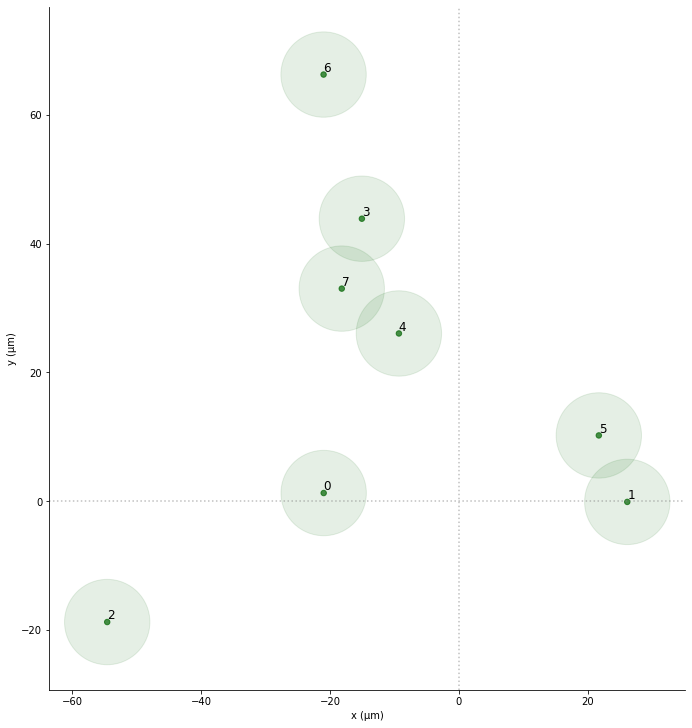

In [123]:
qubits = dict(enumerate(coords))
reg = Register(qubits)
reg.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1),
    draw_graph=False,
    draw_half_radius=True,
)